In [1]:
#kütüphanelerin import edilmesi
import pandas as pd
import matplotlib as plt
from sklearn.decomposition import PCA # priciple componenet analysis
# cok boyutlu vektörlere boyut indirgemesi yapıcağız 
# dimension reduction
from gensim.models import Word2Vec, FastText
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D çizim için gerekli


In [2]:
# örnek veriseti oluşturma
sentences = [
    "Köpek çok tatlı bir hayvandır",
    "Köpekler evcil hayvanlardır",
    "Kediler genellikle bağımsız haraket etmeyi severler",
    "Köpekler sadık ve dost canlısı hayvanlardır",
    "Hayvanlar insanlar için iyi arkadaşlardır",
]

# küçük harflere cevirip tokenize yapmak için simple_process işlemi yaptık
# farklı yollar var tabiki ben bunu kullandım bu sefer
tokenizeSentences =[simple_preprocess(sentence) for sentence in sentences]
print(tokenizeSentences)


[['köpek', 'çok', 'tatlı', 'bir', 'hayvandır'], ['köpekler', 'evcil', 'hayvanlardır'], ['kediler', 'genellikle', 'bağımsız', 'haraket', 'etmeyi', 'severler'], ['köpekler', 'sadık', 've', 'dost', 'canlısı', 'hayvanlardır'], ['hayvanlar', 'insanlar', 'için', 'iyi', 'arkadaşlardır']]


In [3]:
# word2vec
word2_vector_model = Word2Vec(sentences= tokenizeSentences, vector_size=50, window=5, min_count=1, sg=0)


In [4]:
#fasttext
fasttext_model = FastText(sentences= tokenizeSentences, vector_size=50, window=5, min_count=1, sg=0)



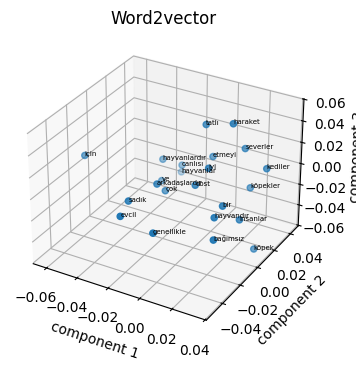

In [ ]:
# görselleştirme tekniği PCA
def plot_word_embedding(model, title):
    word_vectors = model.wv 
    words = list(word_vectors.index_to_key)[:1000]
    vectors = [word_vectors[word] for word in words]

    #PCA 
    pca = PCA(n_components=4)
    reduced_vectors = pca.fit_transform(vectors)

    #3d görselleştirme
    fig = plt.figure(figsize = (6,4))
    ax = fig.add_subplot(111, projection="3d")

    #vektorleri ciz
    ax.scatter(reduced_vectors[:,0], reduced_vectors[:,1], reduced_vectors[:,2])

    # kelimeleri etiketle
    for i, word in enumerate(words):
        ax.text(reduced_vectors[i,0],reduced_vectors[i,1], reduced_vectors[i,2], word , fontsize=5)

    ax.set_title(title)
    ax.set_xlabel("component 1")
    ax.set_ylabel("component 2")
    ax.set_zlabel("component 3")

plot_word_embedding(word2_vector_model, "Word2vector")
#plot_word_embedding(fasttext_model, "FastText")

